# Assignment 1

# Group Members

1.   Hana Shah Binti Faizal Shah 
2.   Jazreel Ooi Sue Ching
3.   Logen Naidu A/L
4.   Siti Adibah Binti Zaini

In [36]:
# Import the libraries needed
import pandas as pd
import numpy as np

# Read Data From The File

In [37]:
# Read the file
data = pd.read_csv('C:/Users/Hana/Documents/USM/YEAR 2/SEM 2/CPC251/assignment1_dataset.csv')

# Check the shape of the data
data.shape

(1000, 6)

In [38]:
# Check the missing values in the data
data.isnull().sum()

f1          0
f2          0
f3          0
f4          0
f5          0
response    0
dtype: int64

# Separate Data Set

In [39]:
# X represents the independent variables while y represents the dependent variable
# Separate the X and y variables
X = data.drop("response",axis = 1)
y = data["response"]

In [40]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [41]:
# Test set data size to be 20% and training set data size to be 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [42]:
print("shape of original dataset ----", data.shape)
print("shape of input training set --", X_train.shape)
print("shape of output training set -", y_train.shape)
print("shape of input testing set  --", X_test.shape)
print("shape of output testing set  -", y_test.shape)

shape of original dataset ---- (1000, 6)
shape of input training set -- (800, 5)
shape of output training set - (800,)
shape of input testing set  -- (200, 5)
shape of output testing set  - (200,)


# Multivariate Linear Regression Using Gradient Descent

In [72]:
# Train model function
def train_model(X, y, alpha, max_epoch):
    
    # Number of samples
    m = X.shape[0] 
    # Return a new array filled with ones
    ones = np.ones((m,1)) 
    # Joining 2 arrays along axis = 1
    # A column which is X0 = 1 is added into X
    X = np.concatenate((ones, X), axis = 1)  
    # The number of features will be 6
    n = X.shape[1] 
    # n = 6 Parameter initialization
    w = np.ones(n)
    
    h = prediction(X, w) 
    
    # Gradient descent algorithm
    hist_loss = np.ones(max_epoch) 
    for i in range(0,max_epoch):
        w[0] = w[0] - (alpha/X.shape[0]) * sum(h-y)
        for j in range(1, n):
            w[j] = w[j] - (alpha/X.shape[0]) * sum((h-y) * X[:,j])
        #Making new hypothesis   
        h = prediction(X,w)
        # Compute cost function
        hist_loss[i] = loss_fn(m, h ,y)
        # Display the training loss value for each epoch of the training loop
        print("Iteration " + str(i + 1) + ": " + str(hist_loss[i]))
    return hist_loss, w

# Prediction function 
def prediction(X, w):
    yhat = np.dot(X,w)
    return yhat

# Loss function
def loss_fn(m, y, yhat):
    loss = 1/(2*m) * sum(np.square(y-yhat))
    return loss

In [75]:
# Calculating w and cost
hist_loss, w = train_model(X_train, y_train, 0.1, 100)

# Display the estimated weights
print("\n")
print("Estimated Weights")
for i in range(w.size):
    print("w" + str(i) + " : " + str(w[i]))

Iteration 1: 650.3259767831349
Iteration 2: 520.4036996096411
Iteration 3: 417.0975505122997
Iteration 4: 334.92791811957875
Iteration 5: 269.5487847277737
Iteration 6: 217.51210293515976
Iteration 7: 176.0813733508447
Iteration 8: 143.08410384641772
Iteration 9: 116.79500452570244
Iteration 10: 95.84348654938269
Iteration 11: 79.14038478383999
Iteration 12: 65.81989076065999
Iteration 13: 55.193524094048016
Iteration 14: 46.71363490677091
Iteration 15: 39.94445444537211
Iteration 16: 34.53912544880179
Iteration 17: 30.221471235804987
Iteration 18: 26.771521230951603
Iteration 19: 24.01401521189239
Iteration 20: 21.80927032991264
Iteration 21: 20.04592292323384
Iteration 22: 18.635158401906914
Iteration 23: 17.50612263349866
Iteration 24: 16.60227172028757
Iteration 25: 15.878467321975805
Iteration 26: 15.29866450032519
Iteration 27: 14.834070622395526
Iteration 28: 14.461678879277022
Iteration 29: 14.163099818917866
Iteration 30: 13.923630031658035
Iteration 31: 13.731509617281356
Ite

# Training Loss Against Epoch Graph 

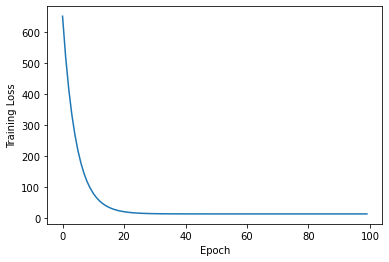

Lowest cost = 12.945997266642078
Cost after 100 iterations = 12.945997266642078


In [76]:
import matplotlib.pyplot as plt

# Plot the graph
plt.plot(hist_loss)

# Label x-axis as Epoch
plt.xlabel("Epoch")

# Label y-axis as training loss
plt.ylabel("Training Loss")

# Display the plotted graph
plt.show()

print("Lowest cost = " + str(np.min(hist_loss)))
print("Cost after " + str(100) + " iterations = " + str(hist_loss[-1]))

# Test the Model

In [77]:
# Add the column x0 = 1 for all rows
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

In [78]:
# Find the value of yhat
yhat = prediction(X_test,w)

In [79]:
# Display the first 5 values of y_test
y_test[0:5]

993   -17.851877
859    10.229663
298   -61.747687
553    -1.411468
672    21.835000
Name: response, dtype: float64

In [80]:
# Display the first 5 values of yhat
yhat[0:5]

array([-12.09134413,  23.25643461, -63.98146682,  -5.55453906,
        22.54576754])

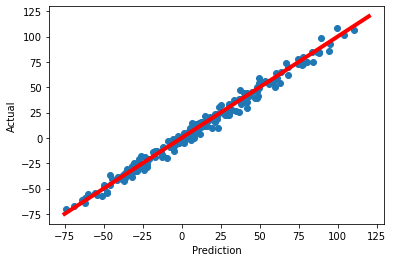

In [81]:
# Display Y predicted against Y test
    
plt.scatter(yhat, y_test)

plt.xlabel("Prediction")
plt.ylabel( "Actual")

# Linear plot
x = np.linspace(-75, 120, 100)
y = x
plt.plot(x, y, 'r', linewidth=4)
plt.show()

# Least R-squared and Mean Squared Error

In [82]:
# Evaluate the linear regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(mean_absolute_error(y_test, yhat))
print(mean_squared_error(y_test, yhat))
print(r2_score(y_test, yhat))

3.809296123029086
21.73067105696941
0.9860500729472225
